In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
# Terms:
#Label : Column which is to be predicted
#Features : Other columns than label

In [6]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
survived = train[train['Survived']==1]['Sex'].value_counts()
dead = train[train['Survived']==0]['Sex'].value_counts()

In [10]:
target = train['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
df = pd.DataFrame([survived,dead])
df.index=['Survived','Dead']
df

Sex,female,male
Survived,233,109
Dead,81,468


<Axes: >

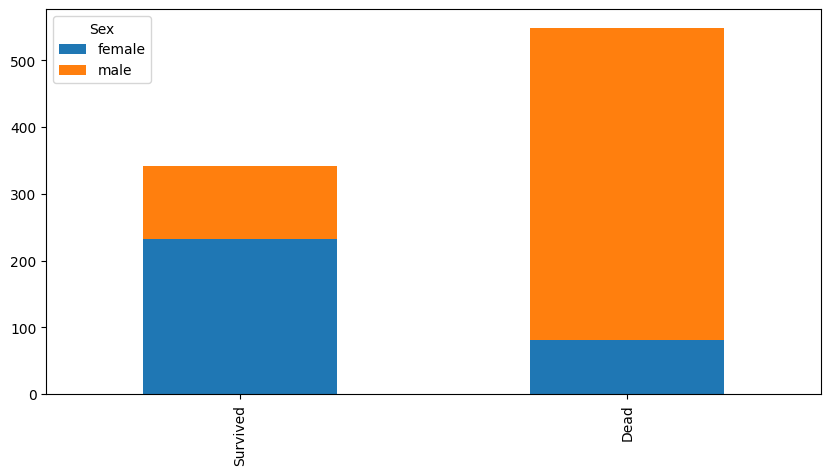

In [12]:
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [13]:
# Defining Function for plotting Data

In [14]:
def bar_plot(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

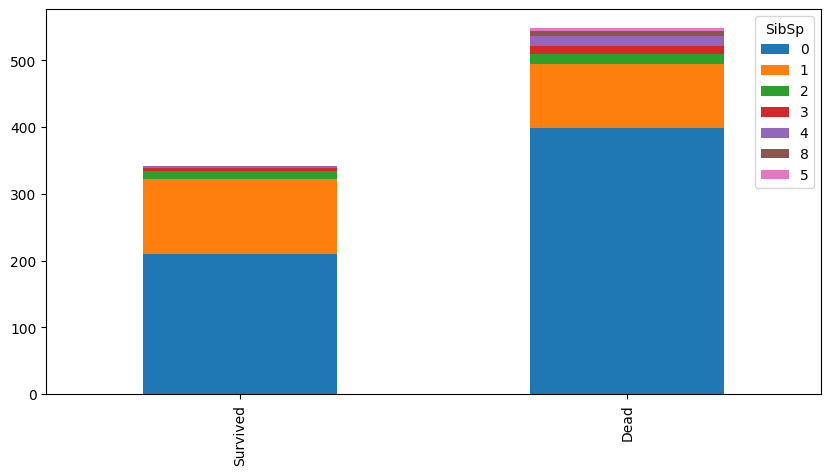

In [15]:
bar_plot('SibSp')

In [16]:
# s='Braund, Mr. Owen Harris'
# s.split(',')[1].split('.')[0][1:]

In [17]:
# Extracting title from name in Name column in both train and test dataset

train_test = [train,test]
for data in train_test:
    data['Title']= data['Name'].str.extract(' ([A-Za-z]+)\.')
    

In [18]:
train['Title'].unique()
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [19]:
# Transforming string value to int value of Title Column

title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, 
                  "Mlle":3, "Major":3, "Col":3, "Countess":3, "Capt":3, 
                  "Ms":3, "Sir":3, "Lady":3, "Mme":3, "Don":3, "Jonkheer":3}
    
for data in train_test:
    data['Title'] = data['Title'].map(title_mapping)

In [20]:
# Transforming string value to int value of Sex Column

mapping = {'male':0, 'female':1}
for data in train_test:
    data['Sex'] = data['Sex'].map(mapping)

In [21]:
# Filling NaN values in Age column with mean wrt its title

train['Age'] = train['Age'].fillna(train.groupby('Title')['Age'].transform('mean'))
test['Age'] = train['Age'].fillna(test.groupby('Title')['Age'].transform('mean'))
# print(train['Age'].isnull().sum())
# print(test['Age'].isnull().sum())


In [22]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
train['Embarked'].isnull().sum()

2

In [24]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
# Filling NaN values in Embarked column with 'S' as it is more frequent

train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [26]:
# Transforming string value to int value of Embarked Column

emb_map={'S':0, 'C':1, 'Q':2}
for data in train_test:
    data['Embarked'] = data['Embarked'].map(emb_map)

In [27]:
train['Embarked'].unique()

array([0, 1, 2], dtype=int64)

In [28]:
test['Fare'].isnull().sum()

1

In [29]:
train.groupby('Pclass')['Fare'].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [30]:
# Filling NaN values in Fare column

train['Fare'] = train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'))
test['Fare'] = train['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'))

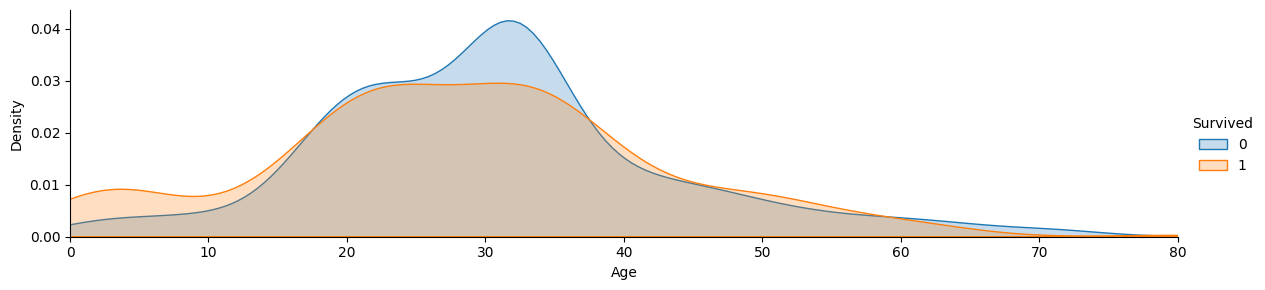

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()
# Instead of Age, Fare density of survived and dead can also be observed

In [32]:
# Concatenating Sibling/Spouse and Parent/Child column to Family Column
train['Family'] = train['SibSp'] + train['Parch']+1  # Here 1 is added for main passenger travelling 

In [33]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [34]:
# Trimming String data to single variable

for data in train_test:
    data['Cabin'] = data['Cabin'].str[:1]

In [35]:
# train.groupby('Pclass')['Cabin'].mean()

In [36]:
# Transforming string value to float value of Cabin Column

cabin_mapping = {'A':0, 'B':0.4, 'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
for data in train_test:
    data['Cabin'] = data['Cabin'].map(cabin_mapping)

In [37]:
train.groupby('Pclass')['Cabin'].mean()

Pclass
1    0.815909
2    1.700000
3    2.033333
Name: Cabin, dtype: float64

In [38]:
# Filling NaN values in Cabin column

train['Cabin'] = train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('mean'))
test['Cabin'] = test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('mean'))

In [39]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Family         0
dtype: int64

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.033333,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.800000,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.033333,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.800000,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2.033333,0,0,1


In [41]:
train_data = train.drop('Name',axis=1)
train_data = train_data.drop('SibSp', axis=1)
train_data = train_data.drop('Parch', axis=1)
train_data = train_data.drop('Ticket', axis=1)


train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,1,0,3,0,22.0,7.2500,2.033333,0,0,2
1,2,1,1,1,38.0,71.2833,0.800000,1,2,2
2,3,1,3,1,26.0,7.9250,2.033333,0,1,1
3,4,1,1,1,35.0,53.1000,0.800000,0,2,2
4,5,0,3,0,35.0,8.0500,2.033333,0,0,1


In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
clf = KNeighborsClassifier(n_neighbors=3)

In [44]:
clf.fit(train_data,target)

KNeighborsClassifier(n_neighbors=3)

In [45]:
clf.score(train_data,target)

0.8047138047138047